In [73]:
from tqdm._tqdm_notebook import tqdm_notebook
import pandas as pd
tqdm_notebook.pandas()

In [10]:
import pandas as pd 

df = pd.DataFrame.from_csv('.\Data\cat2_full_categories.txt', sep='\t', header=0)

C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
len(df)

496009

In [12]:
df.head()

,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,state,id,link,county,newspaper,date,content,notice_id,category
0,1,1,1,Mississippi,626/2272017_23983816,http://www.publicnoticeads.com/MS/search/view....,Pearl River,Picayune Item,2017/02/24,"Notice of Auction\nOn Friday, March 17, 2017 a...",23983816.0,['Auctions']
1,9,9,9,Mississippi,626/2272017_23983815,http://www.publicnoticeads.com/MS/search/view....,Pearl River,Picayune Item,2017/02/24,"Public Notice\nOn October 28, 2015, the PA Sta...",23983815.0,['License Suspension']
2,16,16,16,Wyoming,3493/3302017_24045793,http://www.publicnoticeads.com/WY/search/view....,Fremont,Riverton Ranger,2017/02/24,Click to view PDF.\n\nREPAYMENT CONTRACT FOR S...,24045793.0,[]
3,17,17,17,Mississippi,626/2272017_23983812,http://www.publicnoticeads.com/MS/search/view....,Pearl River,Picayune Item,2017/02/24,NOTICE OF MEDICAL PRACTICE CLOSURE:\nEffective...,23983812.0,[]
4,19,19,19,Arkansas,3147/2272017_23983801,http://www.publicnoticeads.com/AR/search/view....,Sebastian,Times Record (Fort Smith),2017/02/24,Fort Smith Port Authority is requesting sealed...,23983801.0,[]


In [13]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1'], inplace=True, axis=1)

In [14]:
df.head()

,state,id,link,county,newspaper,date,content,notice_id,category
0,Mississippi,626/2272017_23983816,http://www.publicnoticeads.com/MS/search/view....,Pearl River,Picayune Item,2017/02/24,"Notice of Auction\nOn Friday, March 17, 2017 a...",23983816.0,['Auctions']
1,Mississippi,626/2272017_23983815,http://www.publicnoticeads.com/MS/search/view....,Pearl River,Picayune Item,2017/02/24,"Public Notice\nOn October 28, 2015, the PA Sta...",23983815.0,['License Suspension']
2,Wyoming,3493/3302017_24045793,http://www.publicnoticeads.com/WY/search/view....,Fremont,Riverton Ranger,2017/02/24,Click to view PDF.\n\nREPAYMENT CONTRACT FOR S...,24045793.0,[]
3,Mississippi,626/2272017_23983812,http://www.publicnoticeads.com/MS/search/view....,Pearl River,Picayune Item,2017/02/24,NOTICE OF MEDICAL PRACTICE CLOSURE:\nEffective...,23983812.0,[]
4,Arkansas,3147/2272017_23983801,http://www.publicnoticeads.com/AR/search/view....,Sebastian,Times Record (Fort Smith),2017/02/24,Fort Smith Port Authority is requesting sealed...,23983801.0,[]


In [31]:
df['temp'] = df['category'].str.len()

In [37]:
df = df[df['temp']>2]

In [38]:
len(df)

440655

In [39]:
df.head()

,state,id,link,county,newspaper,date,content,notice_id,category,temp
0,Mississippi,626/2272017_23983816,http://www.publicnoticeads.com/MS/search/view....,Pearl River,Picayune Item,2017/02/24,"Notice of Auction\nOn Friday, March 17, 2017 a...",23983816.0,['Auctions'],12
1,Mississippi,626/2272017_23983815,http://www.publicnoticeads.com/MS/search/view....,Pearl River,Picayune Item,2017/02/24,"Public Notice\nOn October 28, 2015, the PA Sta...",23983815.0,['License Suspension'],22
6,Louisiana,346/2242017_23980782,http://www.publicnoticeads.com/LA/search/view....,Lincoln,The Ruston Daily Leader,2017/02/24,February 24 Legals\n\n\nNOTICE OF SPECIAL ELEC...,23980782.0,['Elections'],13
17,Louisiana,363/3012017_23987556,http://www.publicnoticeads.com/LA/search/view....,St. Bernard,The St. Bernard Voice,2017/02/24,Sheriff's Sales Bank of America NA vs. Katedra...,23987556.0,['Auctions'],12
20,Louisiana,363/3012017_23987557,http://www.publicnoticeads.com/LA/search/view....,St. Bernard,The St. Bernard Voice,2017/02/24,Sheriff's Sales Gulf Coast Bank and Trust Co v...,23987557.0,['Auctions'],12


In [91]:
df.head(500).to_csv('classified.csv')

In [86]:
category = list(set(df.category.values))
len(category)

4213

In [69]:
final_category = []
for c in category:
    for cc in c.split(','):
        cc = cc.strip()
        final_category.append(cc.replace('[','').replace(']','').replace('\'','').replace(',',''))
print(len(final_category))

34458


In [70]:
final_category = list(set(final_category)) 
print(len(final_category))

34


In [98]:
len(df[df['Auctions']==False])

272005

In [85]:
for idx, row in df.iterrows():
    for hobby in row.category.split(","):
        hobby = hobby.strip()
        hobby = hobby.replace('[','').replace(']','').replace('\'','').replace(',','')
        df.loc[idx, hobby] = True

df.fillna(False, inplace=True)

In [90]:
df.head()

,state,id,link,county,newspaper,date,content,notice_id,category,temp,...,Prevailing Wage Notices,Metro Districts,Divorces,Schedule of Meetings,Fictitious Business Names (DBA),Water Resumes,Tax Deeds,Seizures,Forfeited Property,Estate Claims
0,Mississippi,626/2272017_23983816,http://www.publicnoticeads.com/MS/search/view....,Pearl River,Picayune Item,2017/02/24,"Notice of Auction\nOn Friday, March 17, 2017 a...",23983816.0,['Auctions'],12,...,False,False,False,False,False,False,False,False,False,False
1,Mississippi,626/2272017_23983815,http://www.publicnoticeads.com/MS/search/view....,Pearl River,Picayune Item,2017/02/24,"Public Notice\nOn October 28, 2015, the PA Sta...",23983815.0,['License Suspension'],22,...,False,False,False,False,False,False,False,False,False,False
6,Louisiana,346/2242017_23980782,http://www.publicnoticeads.com/LA/search/view....,Lincoln,The Ruston Daily Leader,2017/02/24,February 24 Legals\n\n\nNOTICE OF SPECIAL ELEC...,23980782.0,['Elections'],13,...,False,False,False,False,False,False,False,False,False,False
17,Louisiana,363/3012017_23987556,http://www.publicnoticeads.com/LA/search/view....,St. Bernard,The St. Bernard Voice,2017/02/24,Sheriff's Sales Bank of America NA vs. Katedra...,23987556.0,['Auctions'],12,...,False,False,False,False,False,False,False,False,False,False
20,Louisiana,363/3012017_23987557,http://www.publicnoticeads.com/LA/search/view....,St. Bernard,The St. Bernard Voice,2017/02/24,Sheriff's Sales Gulf Coast Bank and Trust Co v...,23987557.0,['Auctions'],12,...,False,False,False,False,False,False,False,False,False,False


In [101]:
cat_count = {}

for c in final_category:
    count = len(df[df[c]==True])
    cat_count[c]=count

C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


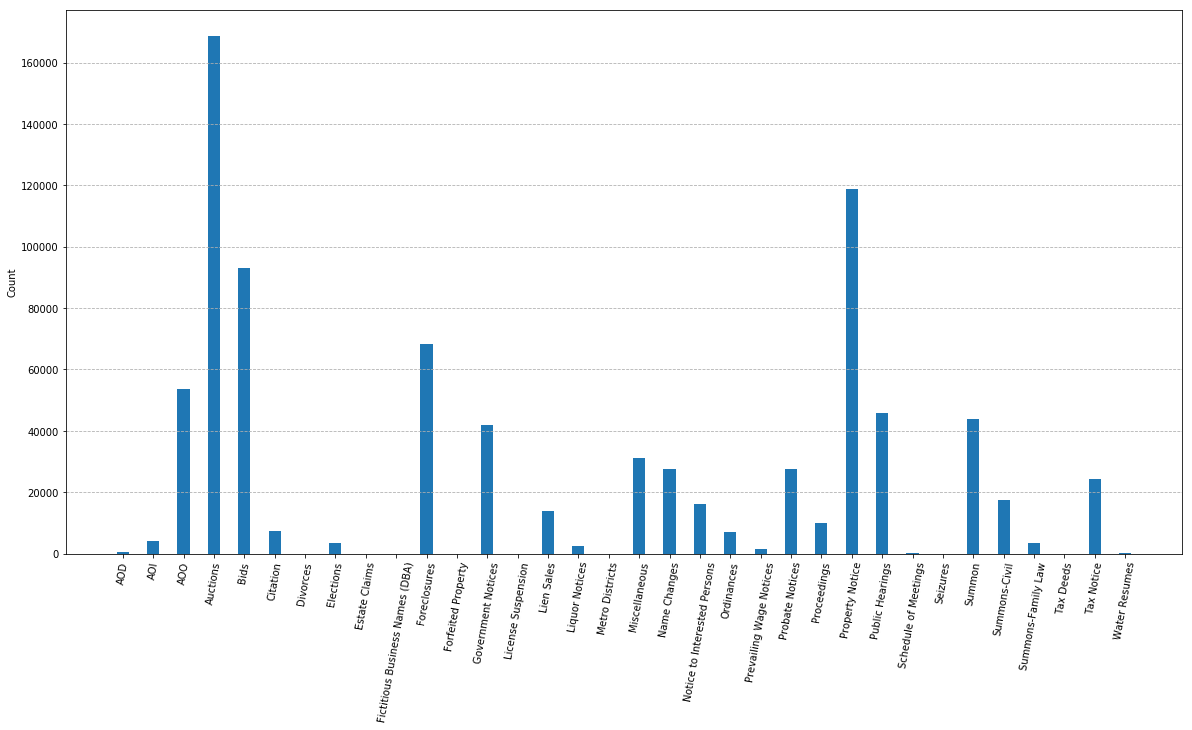

In [110]:
from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)
width = 1/1.5
lists = sorted(cat_count.items()) # sorted by key, return a list of tuples
x, y = zip(*lists)

ax.bar(x,y,width=0.4)
ax.set_xticks(np.arange(len(x)))
ax.set_ylabel("Count")
ax.set_xticklabels(x, rotation = 80, zorder=100)
plt.gca().yaxis.grid(linestyle='--')
fig.show()